## 1 Approximation de fonctions par des polynômes

### 1 
N représente le nombre de points de données disponibles à partir de la fonction. Pour ajuster un polynôme de degré d, il est nécessaire d'avoir suffisamment de points (N) pour que le polynôme puisse être correctement ajusté. 
Pour un ajustement précis, il est nécessaire d'avoir un nombre de points N plus grand que le nombre de degrés de liberté d du polynôme. Sinon, le système peut être surcontraint ou instable. Plus il y a de points de données, plus le polynôme peut capturer les variations de la fonction.

### 2
Pour un polynôme de degré d, le problème aux moindres carrés consiste à trouver les coefficients $c_0,c_1,...,c_d$ du polynôme $P(x) = c_0 + c_1x + c_2x + ... + c_dx^d$ tels que la somme des carrés des différences entre $P(x_i)$ et les valeurs observées $y_i$ soit minimale pour N points de données $(x_1,y_1),(x_2,y_2),...,(x_N,y_N)$

$$
\begin{bmatrix}
    1 & x_1 & x_1^2 & \cdots & x_1^d \\
    1 & x_2 & x_2^2 & \cdots & x_2^d \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_N & x_N^2 & \cdots & x_N^d \\
\end{bmatrix}
\begin{bmatrix}
    c_0 \\
    c_1 \\
    \vdots \\
    c_d \\
\end{bmatrix}
=
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_N \\
\end{bmatrix}
$$

Le noyau d'une matrice A est défini comme : 

$
\text{Ker}(A) = \{ \mathbf{x} \in \mathbb{R}^n : A\mathbf{x} = \mathbf{0} \}
$

<div class="alert alert-block alert-danger"> Finir la justification de Ker(A). </div>


### 3

<div class="alert alert-block alert-danger"> Finir la question 3. </div>

### 4

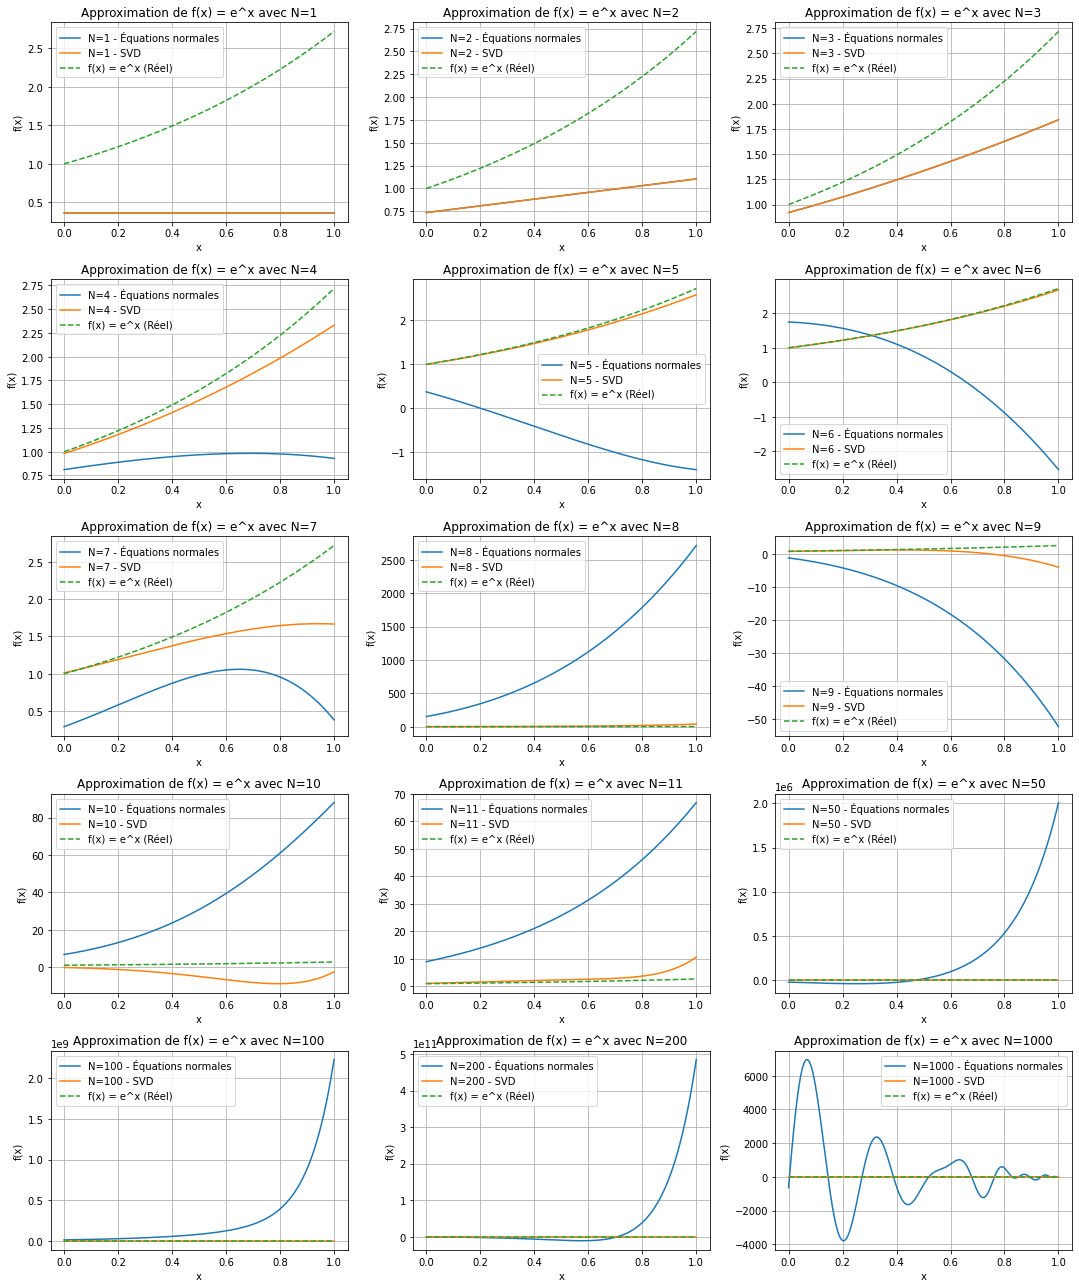

In [2]:
import numpy as np
import matplotlib.pyplot as plt

d = [i for i in range(11)]

# Génération des valeurs x_i
N_values = [i + 1 for i in d] + [50,100,200, 1000]  # Différentes valeurs de N
x_values = np.linspace(-1, 1, max(N_values))

# Calcul des valeurs de f(x_i)
f_values = np.exp(x_values)

# Création des graphiques dans une configuration 5 lignes sur 3 colonnes
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 18))

for idx, N in enumerate(N_values):
    row = idx // 3
    col = idx % 3
    
    # Construction de la matrice A
    A = np.vander(x_values[:N], increasing=True)
    
    # Calcul des coefficients du polynôme avec les équations normales
    coeffs_normal_equations = np.linalg.inv(A.T @ A) @ A.T @ f_values[:N]
    
    # Calcul des coefficients du polynôme avec la décomposition SVD
    U, S, VT = np.linalg.svd(A)
    coeffs_svd = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ f_values[:N]
    
    # Calcul du polynôme pour l'intervalle [0, 1]
    x_interval = np.linspace(0, 1, 1000)
    A_interval = np.vander(x_interval, increasing=True)
    poly_normal_equations = np.polyval(coeffs_normal_equations[::-1], x_interval)
    poly_svd = np.polyval(coeffs_svd[::-1], x_interval)
    
    # Tracé des polynômes approximatifs dans des sous-graphiques séparés
    axs[row, col].plot(x_interval, poly_normal_equations, label=f"N={N} - Équations normales")
    axs[row, col].plot(x_interval, poly_svd, label=f"N={N} - SVD")
    axs[row, col].plot(x_interval, np.exp(x_interval), label="f(x) = e^x (Réel)", linestyle='--')
    
    # Réglages des sous-graphiques
    axs[row, col].set_xlabel('x')
    axs[row, col].set_ylabel('f(x)')
    axs[row, col].set_title(f'Approximation de f(x) = e^x avec N={N}')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()